In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
data = pd.read_csv('clean.csv')

In [5]:
data

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,8,0,0,0,16567,6.8,17047,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,2,1,1,1,17620,6.8,17438,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,14,0,0,0,17285,6.8,17254,203,28
3,0,43,1,0,4,5,5,0,1,0,...,2,10,0,0,0,16478,7.0,17961,235,47
4,0,75,4,0,6,6,6,0,0,0,...,2,7,1,0,0,17404,7.0,18313,225,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,0,0,...,3,7,0,0,0,15246,6.8,16498,229,34
9875,1,54,0,0,6,4,8,1,0,0,...,21,3,0,0,0,15456,7.0,18367,206,56
9876,0,23,1,0,6,7,5,0,0,0,...,0,11,1,0,0,18319,7.4,19909,261,60
9877,0,14,4,1,2,3,3,1,0,0,...,4,1,0,0,0,15298,7.2,18314,247,40


In [6]:
X = data.iloc[:, 1:]
y = data['blueWins']

In [7]:
print(X.shape)
print(y.shape)
print('Class labels:', np.unique(y))

(9879, 25)
(9879,)
Class labels: [0 1]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [4949 4930]
Labels counts in y_train: [3464 3451]
Labels counts in y_test: [1485 1479]


In [10]:
# StandardScaler estimated the parameters,  (sample mean) and  (standard deviation), 
# for each feature dimension from the training data. 
# By calling the transform method, 
# we then standardized the training data using those estimated parameters,  a
# we used the same scaling parameters to standardize the test dataset 
# so that both the values in the training and test dataset are comparable to each other.

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [11]:
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

Decision trees and random forests are two of the very few machine learning algorithms where we don't need to worry about feature scaling

In [12]:
# Although normalization via min-max scaling is a commonly used technique that is useful when 
# we need values in a bounded interval, 
# standardization can be more practical for many machine learning algorithms, 
# especially for optimization algorithms such as gradient descent. 
# The reason is that many linear models, 
# such as the logistic regression and SVM
# initialize the weights to 0 or small random values close to 0. 
# Using standardization, 
# we center the feature columns at mean 0 with standard deviation 1 
# so that the feature columns have the same parameters 
# as a standard normal distribution (zero mean and unit variance), 
# which makes it easier to learn the weights. 
# Furthermore, standardization maintains useful information about outliers 
# and makes the algorithm less sensitive to them in contrast to min-max scaling, 
# which scales the data to a limited range of values.

## LogisticRegression

In [13]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

print('Logistic Regression')
print('accuracy score:', round(accuracy_score(y_test, lr_y_pred),2))
print('precision score:', round(precision_score(y_test, lr_y_pred), 2))
print('recall score:', round(recall_score(y_test, lr_y_pred),2))
print('f1 score:', round(f1_score(y_test, lr_y_pred), 2))

Logistic Regression
accuracy score: 0.72
precision score: 0.72
recall score: 0.72
f1 score: 0.72


In [14]:
lr_std = LogisticRegression(random_state=42)
lr_std.fit(X_train_std, y_train)
lr_y_pred_std = lr_std.predict(X_test_std)

print('Logistic Regression')
print('accuracy score:', round(accuracy_score(y_test, lr_y_pred_std),2))
print('precision score:', round(precision_score(y_test, lr_y_pred_std), 2))
print('recall score:', round(recall_score(y_test, lr_y_pred_std),2))
print('f1 score:', round(f1_score(y_test, lr_y_pred_std), 2))

Logistic Regression
accuracy score: 0.72
precision score: 0.72
recall score: 0.73
f1 score: 0.73


In [15]:
lr_norm = LogisticRegression(random_state=42)
lr_norm.fit(X_train_norm, y_train)
lr_y_pred_norm = lr_norm.predict(X_test_norm)

print('Logistic Regression')
print('accuracy score:', round(accuracy_score(y_test, lr_y_pred_norm),2))
print('precision score:', round(precision_score(y_test, lr_y_pred_norm), 2))
print('recall score:', round(recall_score(y_test, lr_y_pred_norm),2))
print('f1 score:', round(f1_score(y_test, lr_y_pred_norm), 2))

Logistic Regression
accuracy score: 0.73
precision score: 0.72
recall score: 0.74
f1 score: 0.73


In [16]:
# L1 regularization, which can help us to avoid overfitting by reducing the complexity of a model

# L1 regularization usually yields sparse feature vectors and most feature weights will be zero. 
# Sparsity can be useful in practice if we have a high-dimensional dataset with 
# many features that are irrelevant, 
# especially in cases where we have more irrelevant dimensions than training examples. 
# In this sense, L1 regularization can be understood as a technique for feature selection.


# since the L1 penalty is the sum of the absolute weight coefficients 
# (remember that the L2 term is quadratic), 

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train_std, y_train)
    clf_y_pred = clf.predict(X_test_std)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', round(clf.score(X_train_std, y_train),2))
    print('Test accuracy:', round(clf.score(X_test_std, y_test), 2))
    print('')

C: 10
Coefficient of each feature: [[-0.05060588  0.00624146  0.03989941 -0.17830676  0.11966111 -0.03650483
   0.18081067 -0.01065741 -0.05512811  0.88840429  0.02824817  0.2118192
  -0.1070222   0.01624977 -0.02844106  0.02199978  0.0731246  -0.14969972
  -0.02453345  0.065656   -0.77401722  0.02089828 -0.38941623  0.12879156
   0.07948544]]
Training accuracy: 0.74
Test accuracy: 0.72

C: 1
Coefficient of each feature: [[-0.04932012  0.00558484  0.03947949 -0.15476994  0.09431558 -0.03240532
   0.17937524 -0.0090911  -0.04933969  0.8604793   0.02807441  0.20837399
  -0.09665317  0.02017021 -0.02783993  0.02095591  0.06931171 -0.14794594
  -0.02353184  0.05939556 -0.74560102  0.01303072 -0.37672691  0.11784165
   0.07209325]]
Training accuracy: 0.74
Test accuracy: 0.72

C: 0.1
Coefficient of each feature: [[-0.0372447   0.          0.03727023  0.          0.          0.
   0.17077836  0.         -0.00260863  0.66036939  0.02448929  0.18882004
  -0.0150288   0.04708822 -0.0208155   0.0

## SVM

In [17]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)

print('SVM')
print('accuracy score:', round(accuracy_score(y_test, svm_y_pred),2))
print('precision score:', round(precision_score(y_test, svm_y_pred),2))
print('recall score:', round(recall_score(y_test, svm_y_pred),2))
print('f1 score:', round(f1_score(y_test, svm_y_pred),2))

SVM
accuracy score: 0.72
precision score: 0.72
recall score: 0.73
f1 score: 0.72


In [18]:
svm_std = SVC(random_state=42)
svm_std.fit(X_train_std, y_train)
svm_y_pred_std = svm_std.predict(X_test_std)

print('SVM')
print('accuracy score:', round(accuracy_score(y_test, svm_y_pred_std),2))
print('precision score:', round(precision_score(y_test, svm_y_pred_std),2))
print('recall score:', round(recall_score(y_test, svm_y_pred_std),2))
print('f1 score:', round(f1_score(y_test, svm_y_pred_std),2))

SVM
accuracy score: 0.72
precision score: 0.72
recall score: 0.73
f1 score: 0.72


In [19]:
svm_norm = SVC(random_state=42)
svm_norm.fit(X_train_norm, y_train)
svm_y_pred_norm = svm_norm.predict(X_test_norm)

print('SVM')
print('accuracy score:', round(accuracy_score(y_test, svm_y_pred_norm),2))
print('precision score:', round(precision_score(y_test, svm_y_pred_norm),2))
print('recall score:', round(recall_score(y_test, svm_y_pred_norm),2))
print('f1 score:', round(f1_score(y_test, svm_y_pred_norm),2))

SVM
accuracy score: 0.72
precision score: 0.72
recall score: 0.73
f1 score: 0.73


In [20]:
svm_lin = SVC(random_state=42, kernel='linear')
svm_lin.fit(X_train, y_train)
svm_y_pred_lin = svm_lin.predict(X_test)

print('SVM')
print('accuracy score:', round(accuracy_score(y_test, svm_y_pred_lin),2))
print('precision score:', round(precision_score(y_test, svm_y_pred_lin),2))
print('recall score:', round(recall_score(y_test, svm_y_pred_lin),2))
print('f1 score:', round(f1_score(y_test, svm_y_pred_lin),2))

SVM
accuracy score: 0.72
precision score: 0.72
recall score: 0.72
f1 score: 0.72


In [21]:
svm_lin_std = SVC(random_state=42, kernel='linear')
svm_lin_std.fit(X_train_std, y_train)
svm_y_pred_lin_std = svm_lin_std.predict(X_test_std)

print('SVM')
print('accuracy score:', round(accuracy_score(y_test, svm_y_pred_lin_std),2))
print('precision score:', round(precision_score(y_test, svm_y_pred_lin_std),2))
print('recall score:', round(recall_score(y_test, svm_y_pred_lin_std),2))
print('f1 score:', round(f1_score(y_test, svm_y_pred_lin_std),2))

SVM
accuracy score: 0.72
precision score: 0.72
recall score: 0.73
f1 score: 0.72


## DecisionTreeClassifier

In [22]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)

tree.fit(X_train, y_train)

tree_y_pred = tree.predict(X_test)

print('Tree')
print('accuracy score:', round(accuracy_score(y_test, tree_y_pred),2))
print('precision score:', round(precision_score(y_test, tree_y_pred),2))
print('recall score:', round(recall_score(y_test, tree_y_pred),2))
print('f1 score:', round(f1_score(y_test, tree_y_pred),2))

Tree
accuracy score: 0.71
precision score: 0.69
recall score: 0.75
f1 score: 0.72


In [23]:
tree_norm = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)

tree_norm.fit(X_train_norm, y_train)

tree_y_pred_norm = tree_norm.predict(X_test_norm)

print('Tree')
print('accuracy score:', round(accuracy_score(y_test, tree_y_pred_norm),2))
print('precision score:', round(precision_score(y_test, tree_y_pred_norm),2))
print('recall score:', round(recall_score(y_test, tree_y_pred_norm),2))
print('f1 score:', round(f1_score(y_test, tree_y_pred_norm),2))

Tree
accuracy score: 0.71
precision score: 0.69
recall score: 0.75
f1 score: 0.72


## RandomForestClassifier

In [24]:
forest = RandomForestClassifier(random_state=42)

forest.fit(X_train, y_train)

forest_y_pred = forest.predict(X_test)

print('Tree')
print('accuracy score:', round(accuracy_score(y_test, forest_y_pred),2))
print('precision score:', round(precision_score(y_test, forest_y_pred),2))
print('recall score:', round(recall_score(y_test, forest_y_pred),2))
print('f1 score:', round(f1_score(y_test, forest_y_pred),2))

Tree
accuracy score: 0.72
precision score: 0.72
recall score: 0.72
f1 score: 0.72


In [26]:
forest_norm = RandomForestClassifier(random_state=42)

forest_norm.fit(X_train_norm, y_train)

forest_y_pred_norm = forest_norm.predict(X_test_norm)

print('Tree')
print('accuracy score:', round(accuracy_score(y_test, forest_y_pred_norm),2))
print('precision score:', round(precision_score(y_test, forest_y_pred_norm),2))
print('recall score:', round(recall_score(y_test, forest_y_pred_norm),2))
print('f1 score:', round(f1_score(y_test, forest_y_pred_norm),2))

Tree
accuracy score: 0.72
precision score: 0.72
recall score: 0.72
f1 score: 0.72


## KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print('Tree')
print('accuracy score:', round(accuracy_score(y_test, knn_y_pred),2))
print('precision score:', round(precision_score(y_test, knn_y_pred),2))
print('recall score:', round(recall_score(y_test, knn_y_pred),2))
print('f1 score:', round(f1_score(y_test, knn_y_pred),2))

Tree
accuracy score: 0.69
precision score: 0.68
recall score: 0.7
f1 score: 0.69


In [28]:
knn_std = KNeighborsClassifier()

knn_std.fit(X_train_std, y_train)
knn_y_pred_std = knn_std.predict(X_test_std)

print('Tree')
print('accuracy score:', round(accuracy_score(y_test, knn_y_pred_std),2))
print('precision score:', round(precision_score(y_test, knn_y_pred_std),2))
print('recall score:', round(recall_score(y_test, knn_y_pred_std),2))
print('f1 score:', round(f1_score(y_test, knn_y_pred_std),2))

Tree
accuracy score: 0.68
precision score: 0.68
recall score: 0.69
f1 score: 0.69


In [29]:
knn_norm = KNeighborsClassifier()

knn_norm.fit(X_train_norm, y_train)
knn_y_pred_norm = knn_norm.predict(X_test_norm)

print('Tree')
print('accuracy score:', round(accuracy_score(y_test, knn_y_pred_norm),2))
print('precision score:', round(precision_score(y_test, knn_y_pred_norm),2))
print('recall score:', round(recall_score(y_test, knn_y_pred_norm),2))
print('f1 score:', round(f1_score(y_test, knn_y_pred_norm),2))

Tree
accuracy score: 0.69
precision score: 0.68
recall score: 0.69
f1 score: 0.69


## Sequential feature selection algorithms

In [30]:
# reduce the complexity of the model and avoid overfitting is 
# dimensionality reduction via feature selection, 
# which is especially useful for unregularized models.


from sklearn.base import clone
from itertools import combinations

class SBS():
    def __init__(self, estimator, k_features,
                 scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)
    
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
        
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [31]:
knn_eve = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn_eve, k_features=1)
sbs.fit(X_train_std, y_train)

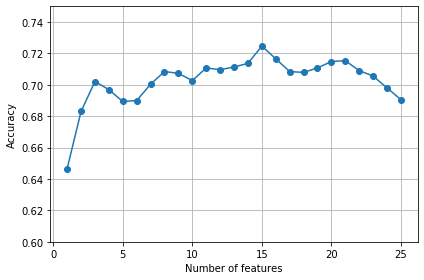

In [32]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.6, 0.75])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

In [33]:
for i in range(25):
    if len(sbs.subsets_[i])==15:
        print(i)

10


In [35]:
k15 = list(sbs.subsets_[10])
print(data.columns[1:][k15])

Index(['blueWardsDestroyed', 'blueKills', 'blueDragons', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsDestroyed', 'redDragons',
       'redHeralds', 'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')


In [36]:
knn_eve.fit(X_train_std, y_train)

knn_y_pred_eve = knn_eve.predict(X_test_std)

print('Training accuracy:', round(knn_eve.score(X_train_std, y_train),4))
print('Test accuracy:', round(knn_eve.score(X_test_std, y_test),4))

Training accuracy: 0.7864
Test accuracy: 0.6845


In [37]:
knn_eve.fit(X_train_std[:, k15], y_train)

knn_y_pred_even = knn_eve.predict(X_test_std[:, k15])

print('Training accuracy:', round(knn_eve.score(X_train_std[:, k15], y_train), 4))
print('Test accuracy:', round(knn_eve.score(X_test_std[:, k15], y_test),4))

Training accuracy: 0.7931
Test accuracy: 0.6815


In [38]:
# This may indicate that those features do not provide less 
# discriminatory information than the original dataset.

# While we did not increase the performance of the KNN model 
# by reducing the number of features, we shrank the size of the dataset, 
# which can be useful in real-world applications that 
# may involve expensive data collection steps. 
# Also, by substantially reducing the number of features, 
# we obtain simpler models, which are easier to interpret.

## Assessing feature importance with random forests

 1) blueTotalGold                  0.124592
 2) redTotalGold                   0.104914
 3) redTotalExperience             0.094390
 4) blueTotalExperience            0.083116
 5) blueTotalMinionsKilled         0.050728
 6) redTotalMinionsKilled          0.049979
 7) blueDeaths                     0.043987
 8) blueTotalJungleMinionsKilled   0.042882
 9) redTotalJungleMinionsKilled    0.042260
10) blueKills                      0.041046
11) blueWardsPlaced                0.039726
12) redAssists                     0.039429
13) redWardsPlaced                 0.038255
14) blueAssists                    0.036247
15) blueAvgLevel                   0.031270
16) redAvgLevel                    0.030150
17) blueWardsDestroyed             0.027127
18) redWardsDestroyed              0.026610
19) blueDragons                    0.013918
20) redDragons                     0.011518
21) blueFirstBlood                 0.010665
22) redHeralds                     0.006716
23) blueHeralds                 

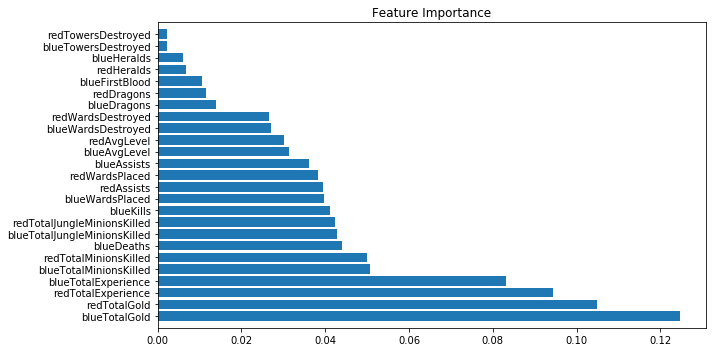

In [39]:
feat_labels = data.columns[1:]

forest = RandomForestClassifier(random_state=42)

forest.fit(X_train, y_train)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))


plt.figure(figsize= (10,5))

plt.title('Feature Importance')

plt.barh(range(X_train.shape[1]), importances[indices], align='center')

plt.yticks(range(X_train.shape[1]), feat_labels[indices], rotation=0)

plt.ylim([-1, X_train.shape[1]])

plt.tight_layout()
plt.show()

In [40]:
# However, as far as interpretability is concerned, 
# the random forest technique comes with an important gotcha that is worth mentioning. 
# If two or more features are highly correlated, 
# one feature may be ranked very highly 
# while the information on the other feature(s) may not be fully captured. 
# On the other hand, we don't need to be concerned about this problem 
# if we are merely interested in the predictive performance of a model 
# rather than the interpretation of feature importance values.

## SelectFromModel

In [41]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.05, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold', 'criterion:', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of features that meet this threshold criterion: 5
 1) blueTotalGold                  0.124592
 2) redTotalGold                   0.104914
 3) redTotalExperience             0.094390
 4) blueTotalExperience            0.083116
 5) blueTotalMinionsKilled         0.050728


## PCA

In [42]:
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [43]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[5.81609522 2.89709742 1.89016027 1.56619826 1.30911826 1.23793264
 1.13363867 1.11122491 1.06351397 0.03122298 0.0354456  0.06619959
 0.07900005 0.14179771 0.19159083 0.28952091 0.41070525 0.33723218
 0.92448807 0.87085092 0.82103946 0.77150876 0.64507624 0.68739618
 0.67556148]


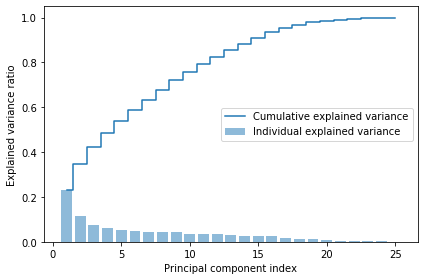

In [44]:
tot = sum(eigen_vals)

var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,26), var_exp, alpha=0.5, align='center', label='Individual explained variance')

plt.step(range(1,26), cum_var_exp, where='mid', label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')

plt.xlabel('Principal component index')

plt.legend(loc='best')

plt.tight_layout()

plt.show()

In [45]:
# we can see that the first two principal components 
# combined explain almost 80 percent of the variance in the dataset:

In [46]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [47]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

Matrix W:
 [[-1.13468999e-02 -2.13953627e-02]
 [-3.67680038e-02  3.56627170e-02]
 [-1.55730629e-01 -1.13297138e-02]
 [-2.66089102e-01 -3.63651709e-01]
 [ 2.60006765e-01 -3.69908044e-01]
 [-2.22710896e-01 -3.44841259e-01]
 [-1.36278292e-01  2.05069484e-02]
 [-7.80041555e-02  2.82881320e-02]
 [-1.19929082e-01 -9.41213413e-02]
 [-3.26936406e-01 -2.37421962e-01]
 [-2.90911407e-01  1.34852869e-01]
 [-3.11130112e-01  1.44273360e-01]
 [-1.84446492e-01  2.95599904e-01]
 [-8.75919443e-02  2.35924062e-01]
 [ 1.10184018e-02  1.71758524e-02]
 [ 4.67433821e-02  4.08922278e-02]
 [ 2.13326358e-01 -3.53736839e-01]
 [ 1.40535774e-01  3.81648395e-02]
 [ 8.30441690e-02 -3.29115056e-04]
 [ 1.12625689e-01 -8.07592051e-02]
 [ 3.22585043e-01 -2.44076820e-01]
 [ 2.91392399e-01  1.22992487e-01]
 [ 3.11624525e-01  1.34427832e-01]
 [ 1.86937919e-01  2.90519477e-01]
 [ 9.50644772e-02  2.22294830e-01]]


In [48]:
X_train_std[0].dot(w)

array([-1.74742023,  4.13319886])

In [49]:
X_train_pca = X_train_std.dot(w)

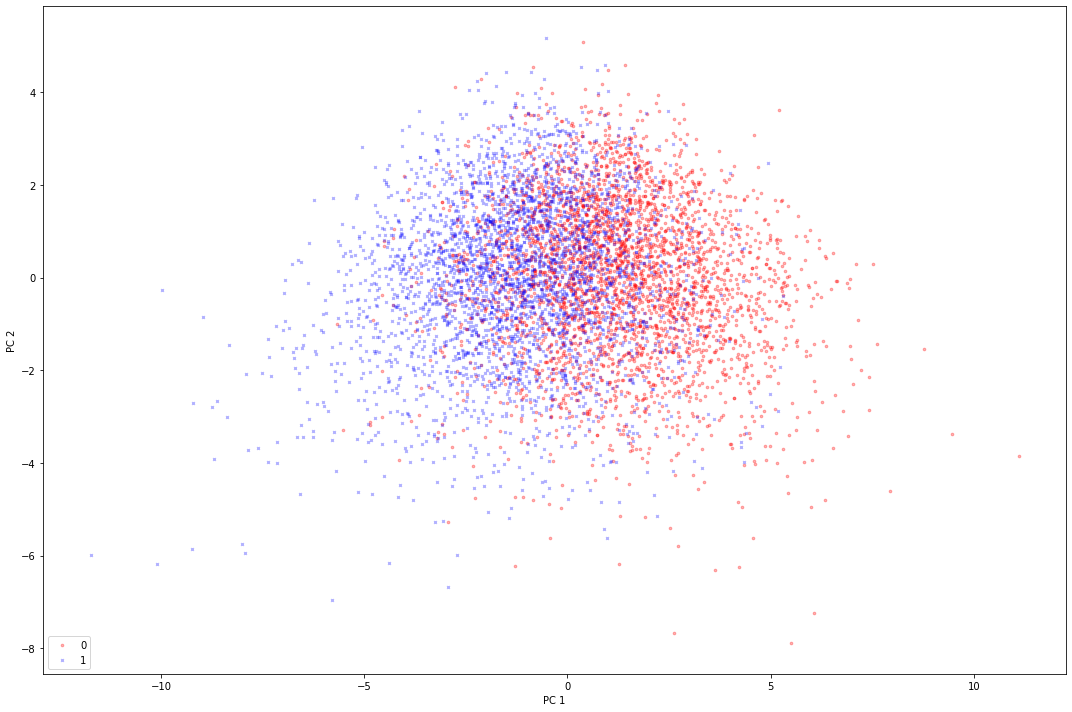

In [50]:
colors = ['r', 'b']

markers = [ 'o', 'x']

plt.figure(figsize=(15,10))
for l, c, m in zip(np.unique(y_train), colors, markers):
        plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m, 
                    s= 7, alpha=0.3)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [51]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.3,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl, s= 10)

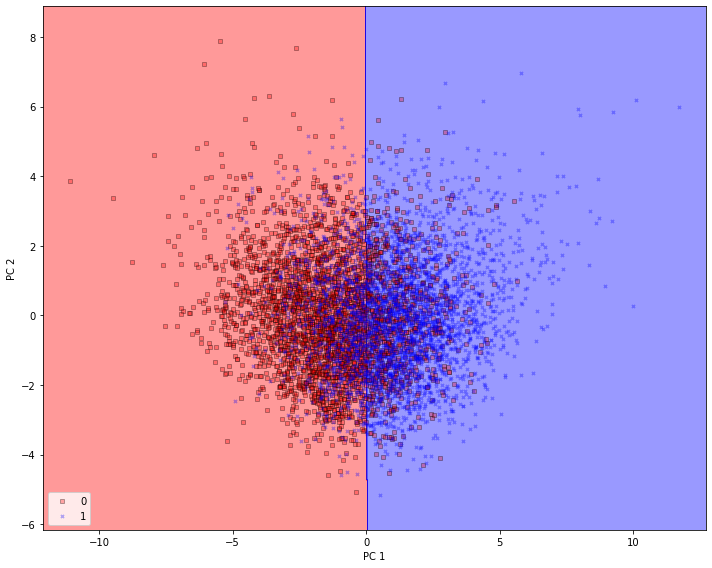

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(random_state=42)

# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)

plt.figure(figsize=(10,8))
plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

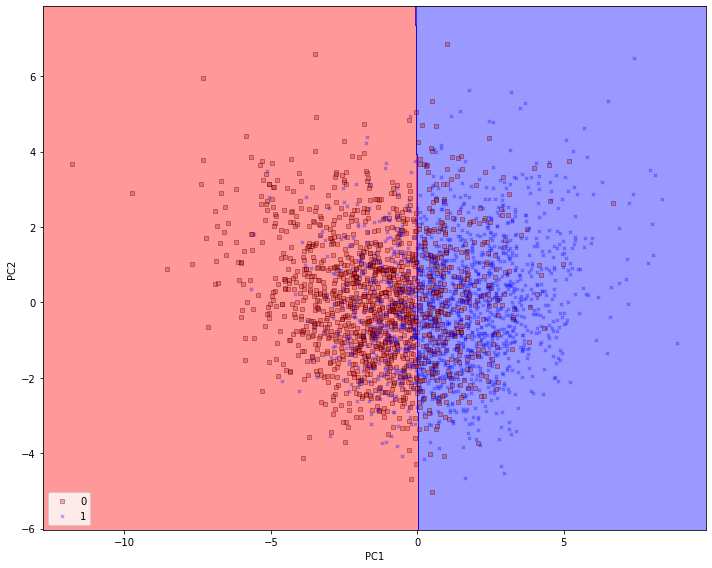

In [53]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [54]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.23261017, 0.11586714, 0.07559548, 0.06263887, 0.05235716,
       0.04951014, 0.04533899, 0.04444257, 0.04253441, 0.03697418,
       0.034829  , 0.03283683, 0.03085589, 0.02749187, 0.02701855,
       0.02579932, 0.01642583, 0.01348734, 0.01157916, 0.00766252,
       0.00567109, 0.00315955, 0.0026476 , 0.00141762, 0.00124874])

# Classification LDA

In [55]:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(0,2):
    mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 0: [ 0.0028 -0.0453 -0.1985 -0.3339  0.3329 -0.2785 -0.2155 -0.0804 -0.1176
 -0.413  -0.349  -0.3843 -0.2159 -0.121   0.0213  0.0467  0.2609  0.2142
  0.0918  0.1166  0.4098  0.353   0.3933  0.2165  0.1131]

MV 1: [ 0.0028 -0.0453 -0.1985 -0.3339  0.3329 -0.2785 -0.2155 -0.0804 -0.1176
 -0.413  -0.349  -0.3843 -0.2159 -0.121   0.0213  0.0467  0.2609  0.2142
  0.0918  0.1166  0.4098  0.353   0.3933  0.2165  0.1131]



In [56]:
d = 25 # number of features

S_W = np.zeros((d, d))
for label, mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.zeros((d, d))

for row in X_train_std[y_train == label]:
    row, mv = row.reshape(d, 1), mv.reshape(d, 1)
    class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter

print('Within-class scatter matrix: %sx%s' % ( S_W.shape[0], S_W.shape[1]))


Within-class scatter matrix: 25x25


In [57]:
 print('Class label distribution: %s' 
       % np.bincount(y_train))

Class label distribution: [3464 3451]


In [58]:
d = 25 # number of features

S_W = np.zeros((d, d))

for label,mv in zip(range(0, 2), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

print('Scaled within-class scatter matrix: %sx%s'
        % (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 25x25


In [59]:
mean_overall = np.mean(X_train_std, axis=0)

d = 25 # number of features

S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1) # make column vector
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot(
    (mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 25x25


In [60]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [61]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

print('Eigenvalues in descending order:\n')

for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

672.4503168121524
9.773443222512302e-13
9.720237790933486e-13
7.437879509763636e-13
7.437879509763636e-13
5.876707830719263e-13
3.4214650020990603e-13
2.693515866762188e-13
2.279678377514385e-13
2.279678377514385e-13
2.1104344161168111e-13
1.6116228879927517e-13
1.6116228879927517e-13
1.4323466211558735e-13
8.185342750146758e-14
8.185342750146758e-14
6.997601494862712e-14
5.168741241038838e-14
5.168741241038838e-14
1.91988475947768e-14
1.91988475947768e-14
1.6781183663007214e-14
3.5744835862024005e-15
9.174558044701644e-16
0.0


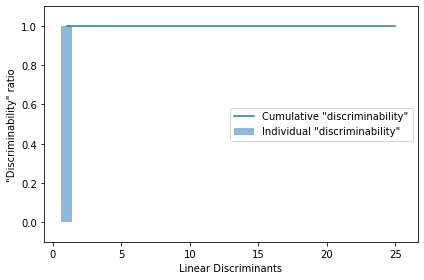

In [62]:
tot = sum(eigen_vals.real)

discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]

cum_discr = np.cumsum(discr)
plt.bar(range(1, 26), discr, alpha=0.5, align='center', label='Individual "discriminability"')

plt.step(range(1, 26), cum_discr, where='mid', label='Cumulative "discriminability"')

plt.ylabel('"Discriminability" ratio')

plt.xlabel('Linear Discriminants')

plt.ylim([-0.1, 1.1])

plt.legend(loc='best')

plt.tight_layout()

plt.show()

In [63]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))

print('Matrix W:\n', w)

Matrix W:
 [[ 0.0369  0.0061]
 [-0.0104  0.0294]
 [-0.0403  0.0191]
 [ 0.1355 -0.0401]
 [-0.0767  0.6833]
 [ 0.0286  0.0199]
 [-0.1388  0.0448]
 [-0.0019  0.0031]
 [ 0.0969  0.06  ]
 [-0.6738  0.2987]
 [-0.0167  0.0047]
 [-0.1518  0.1423]
 [ 0.0888 -0.0586]
 [-0.0103 -0.0208]
 [ 0.0171 -0.0154]
 [-0.0147  0.0024]
 [-0.0552 -0.0014]
 [ 0.1229 -0.0166]
 [ 0.0219  0.002 ]
 [-0.0692  0.1289]
 [ 0.5786 -0.3068]
 [-0.037  -0.3064]
 [ 0.2905  0.4526]
 [-0.0978 -0.0031]
 [-0.0627 -0.0285]]


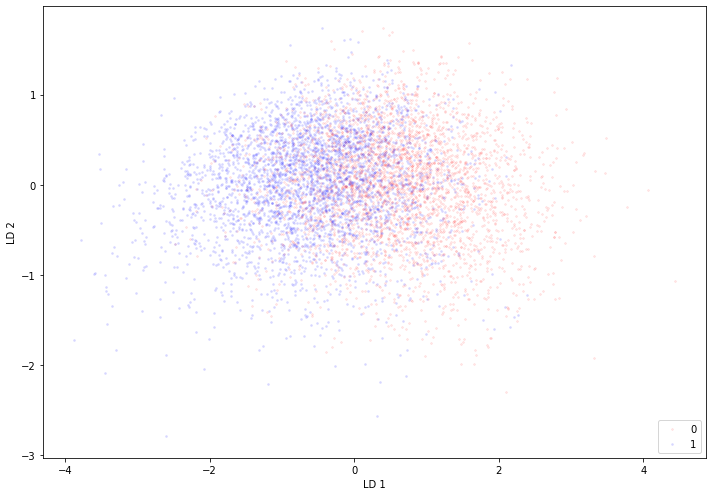

In [64]:
X_train_lda = X_train_std.dot(w)

colors = ['r', 'b']
markers = ['x', 'o']

plt.figure(figsize=(10,7))

for l, c, m in zip(np.unique(y_train), colors, markers):
     plt.scatter(X_train_lda[y_train==l, 0], X_train_lda[y_train==l, 1] * (-1),
    c=c, label=l, marker=m, s=3, alpha=0.1)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [65]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
class MajorityVoteClassifier(BaseEstimator,
                             ClassifierMixin):
    """ A majority vote ensemble classifier
    
    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble
    
    vote : str, {'classlabel', 'probability'}
      Default: 'classlabel'
      If 'classlabel' the prediction is based on
      the argmax of class labels. Else if
      'probability', the argmax of the sum of
      probabilities is used to predict the class label
      (recommended for calibrated classifiers).
    
    weights : array-like, shape = [n_classifiers]
      Optional, default: None
      If a list of `int` or `float` values are
      provided, the classifiers are weighted by
      importance; Uses uniform weights if `weights=None`.
    
    """
    def __init__(self, classifiers,
                 vote='classlabel', weights=None):
        
        self.classifiers = classifiers
        self.named_classifiers = {key: value for
                                  key, value in
                                  _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def fit(self, X, y):
        """ Fit classifiers.
        
        Parameters
        ----------
        X : {array-like, sparse matrix},
            shape = [n_examples, n_features]
            Matrix of training examples.
        
        y : array-like, shape = [n_examples]
            Vector of target class labels.
        
        Returns
        -------
        self : object
        
        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability'"
                             "or 'classlabel'; got (vote=%r)"
                             % self.vote)
        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError("Number of classifiers and weights"
                             "must be equal; got %d weights,"
                             "%d classifiers"
                             % (len(self.weights),
                             len(self.classifiers)))
        # Use LabelEncoder to ensure class labels start
        # with 0, which is important for np.argmax
        # call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
                               self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    
    def predict(self, X):
        """ Predict class labels for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix},
            Shape = [n_examples, n_features]
            Matrix of training examples.
        
        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.
        
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else: # 'classlabel' vote
            
            # Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in
                                      self.classifiers_]).T
            
            maj_vote = np.apply_along_axis(lambda x: np.argmax(
                                           np.bincount(x,
                                           weights=self.weights)),
                                           axis=1,
                                           arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, X):
        """ Predict class probabilities for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, 
            shape = [n_examples, n_features]
            Training vectors, where
            n_examples is the number of examples and
            n_features is the number of features.
        
        Returns
        ----------
        avg_proba : array-like,
            shape = [n_examples, n_classes]
            Weighted average probability for
            each class per example.
        
        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0,
                               weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, 
                           self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(
                        deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

clf1 = LogisticRegression(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = KNeighborsClassifier()
clf4 = RandomForestClassifier(random_state=42)
clf5 = SVC(random_state=42, probability = True)

pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
pipe5 = Pipeline([['sc', StandardScaler()], ['clf', clf5]])
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3, clf4, pipe5])
    
clf_labels = ['Logistic regression', 'Decision tree', 'KNN', 'RandomForestClassifier', 'SVM', 'mv_clf']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3, clf4, pipe5, mv_clf], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.81 (+/- 0.02) [Logistic regression]
ROC AUC: 0.63 (+/- 0.03) [Decision tree]
ROC AUC: 0.74 (+/- 0.01) [KNN]
ROC AUC: 0.79 (+/- 0.02) [RandomForestClassifier]
ROC AUC: 0.79 (+/- 0.02) [SVM]
ROC AUC: 0.78 (+/- 0.02) [mv_clf]


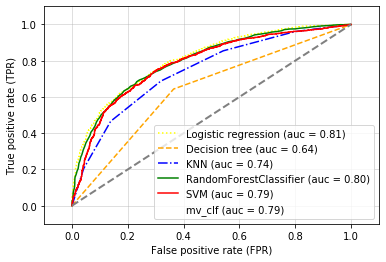

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

colors = ['yellow', 'orange', 'b', 'green', 'r', 'black']
all_clf = [pipe1, clf2, pipe3, clf4, pipe5, mv_clf]
linestyles = [':', '--', '-.', '-', 'solid', '']


for clf, label, clr, ls \
    in zip(all_clf, clf_labels, colors, linestyles):
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.show()

In [69]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(random_state=42, C = 1)

param_grid = {'C': [0.001, 0.1, 10, 100.0]}

lr_cv = GridSearchCV(lr, param_grid, cv=10)
lr_cv.fit(X_train_std, y_train)

print(lr_cv.best_params_) 
print(lr_cv.best_score_)

{'C': 0.1}
0.733914156412337


In [70]:
param_grid = {'n_neighbors': np.arange(1,25)} 

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10) 

knn_cv.fit(X_train_std,y_train) 
print(knn_cv.best_params_) 
print(knn_cv.best_score_)

{'n_neighbors': 23}
0.7117871811816668


In [73]:
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=2),
                        LogisticRegression(random_state=42, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.726


In [ ]:
pipe_svc = make_pipeline(StandardScaler(), SVC(random_state=42))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 'svc__kernel': ['linear']},
              {'svc__C': param_range,'svc__gamma': param_range,'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy',cv=10,refit=True,n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [74]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

Fold:  1, Class dist.: [3118 3105], Acc: 0.712
Fold:  2, Class dist.: [3117 3106], Acc: 0.702
Fold:  3, Class dist.: [3117 3106], Acc: 0.753
Fold:  4, Class dist.: [3117 3106], Acc: 0.734
Fold:  5, Class dist.: [3117 3106], Acc: 0.714
Fold:  6, Class dist.: [3118 3106], Acc: 0.747
Fold:  7, Class dist.: [3118 3106], Acc: 0.742
Fold:  8, Class dist.: [3118 3106], Acc: 0.744
Fold:  9, Class dist.: [3118 3106], Acc: 0.731
Fold: 10, Class dist.: [3118 3106], Acc: 0.715


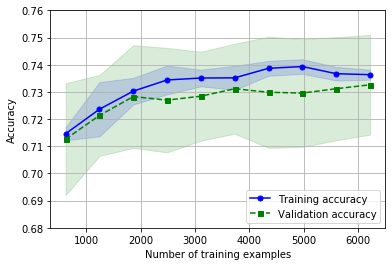

In [84]:
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(StandardScaler(), LogisticRegression(random_state= 42))


train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,X=X_train,
                                    y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.68, 0.76])
plt.show()

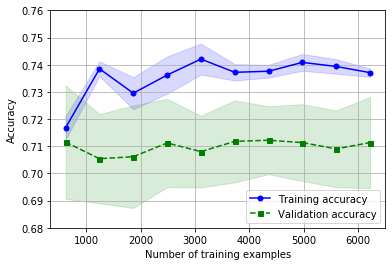

In [85]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=23))


train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_knn,X=X_train,
                                    y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.68, 0.76])
plt.show()

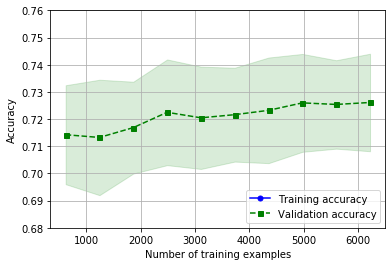

In [89]:
svm_lr = make_pipeline(StandardScaler(), SVC(random_state= 42))


train_sizes, train_scores, test_scores = learning_curve(estimator=svm_lr, X=X_train,
                                    y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,train_mean + train_std, train_mean - train_std,alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,color='green', linestyle='--', marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()

plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.68, 0.76])
plt.show()

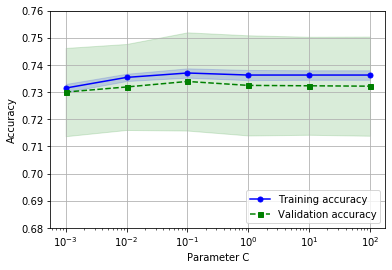

In [88]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_lr,X=X_train,
                            y=y_train, param_name='logisticregression__C', param_range=param_range,cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o',markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std,train_mean - train_std, alpha=0.15, color='blue')

plt.plot(param_range, test_mean,  color='green', linestyle='--', marker='s', markersize=5,label='Validation accuracy')

plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.68, 0.76])
plt.show()